In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load our data in 
housing = pd.read_csv("housing.csv")

### Exploratory Data Analysis

Now that we have loaded our data we can now take a look at our data to see if we can find any N/A values and also look for any outliers that might be in our data. 

In [3]:
# let's look at our data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# let's get a simple stats summary of our data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


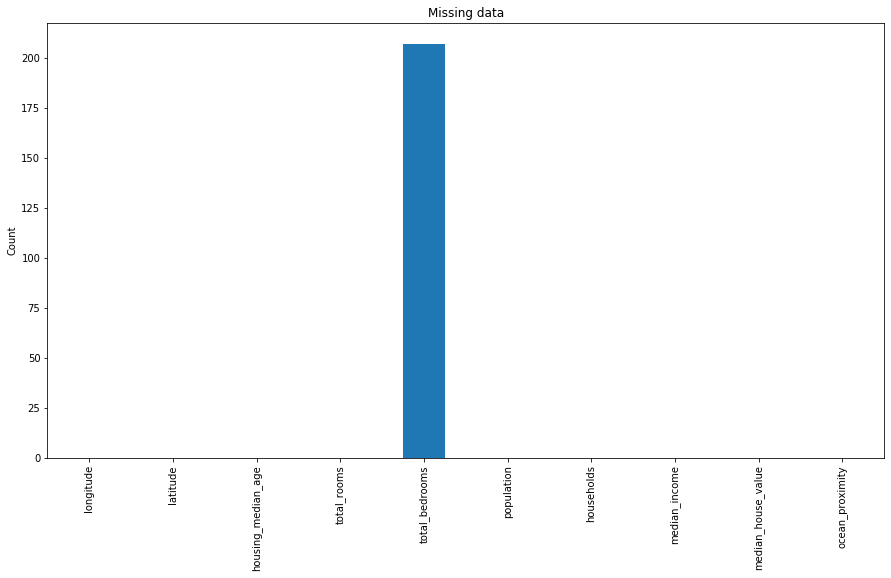

In [5]:
# finding missing values
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")

housing.isnull().sum().plot(kind = 'bar')


In [6]:
# looks like we are missing some bedroom data, we will replace the missing data with the median total bedrooms because we have some
# outliers that would make the mean inaccurate and we don't want to drop the outliers.
median = housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median, inplace=True)
print(housing.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8A75564E0>,
      dtype=object)

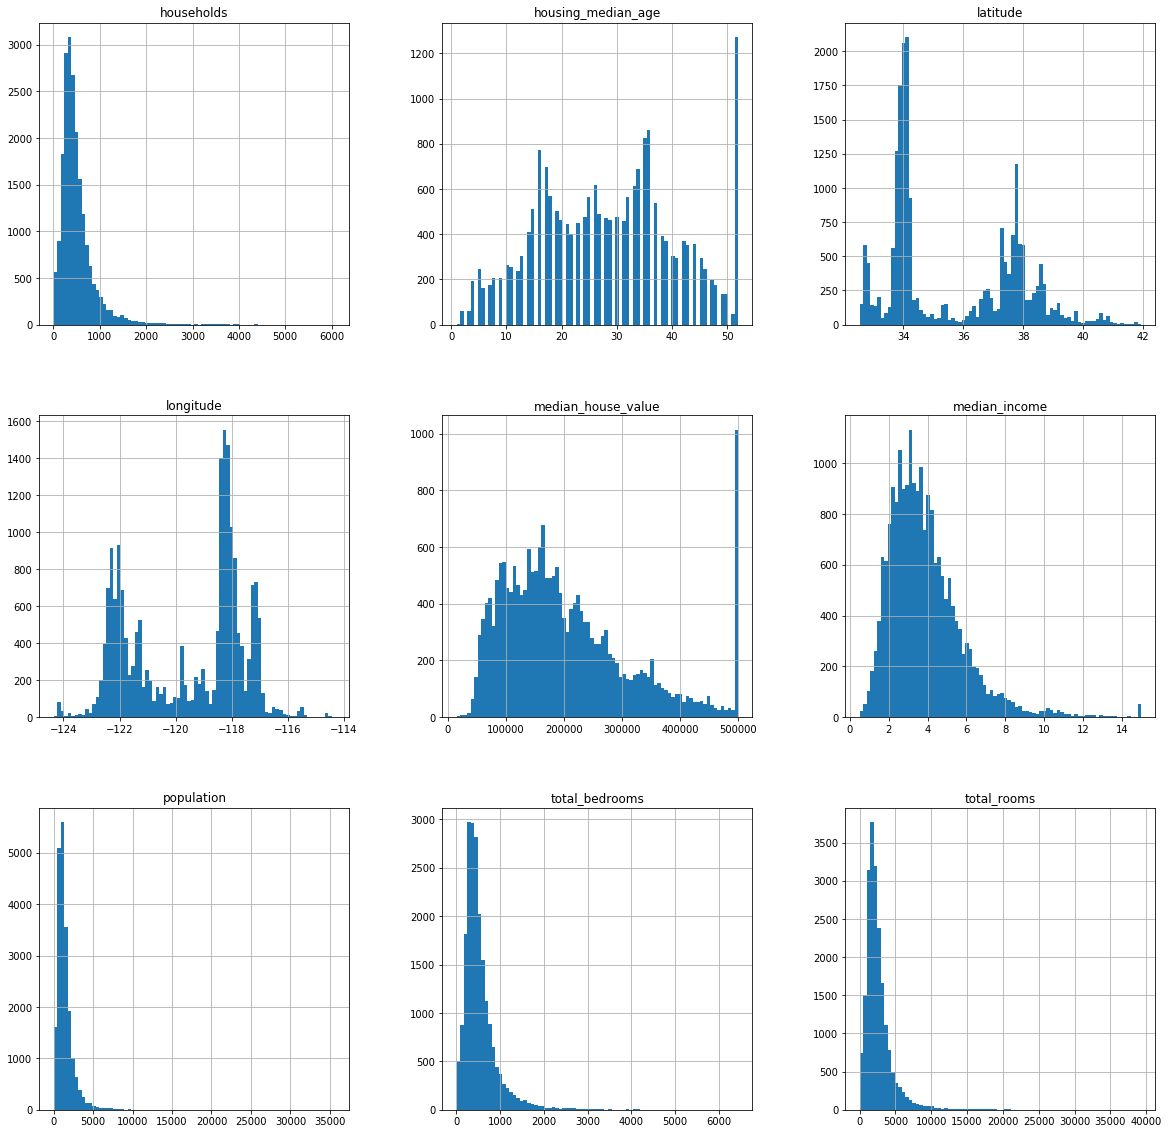

In [7]:
# much better, now let's make some histograms of our data
housing.hist(bins=80, figsize=(20,20))

#### We can see in the histograms above that our data tends to be skewed to the right. This will be something we will consider when we model are data later on. Next we will take a look at house value in comparison to there proximity to water whether it be the ocean or bay.  

Text(0.5, 1.0, 'House value on Ocean Proximity Categories')

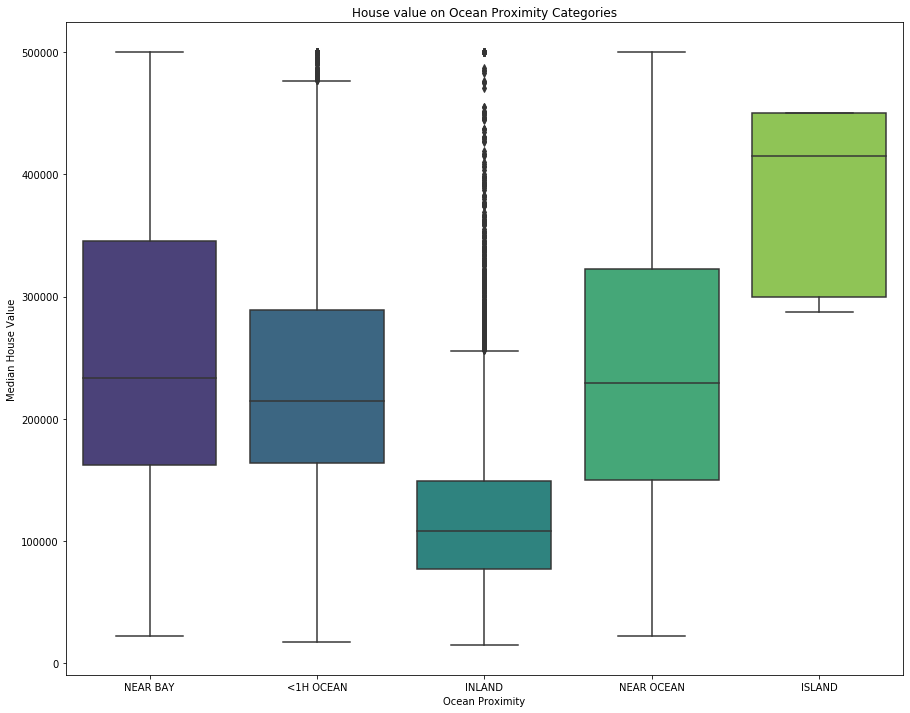

In [8]:
plt.figure(figsize=(15,12))
sns.boxplot(data=housing, x="ocean_proximity", y="median_house_value", palette="viridis")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("House value on Ocean Proximity Categories")

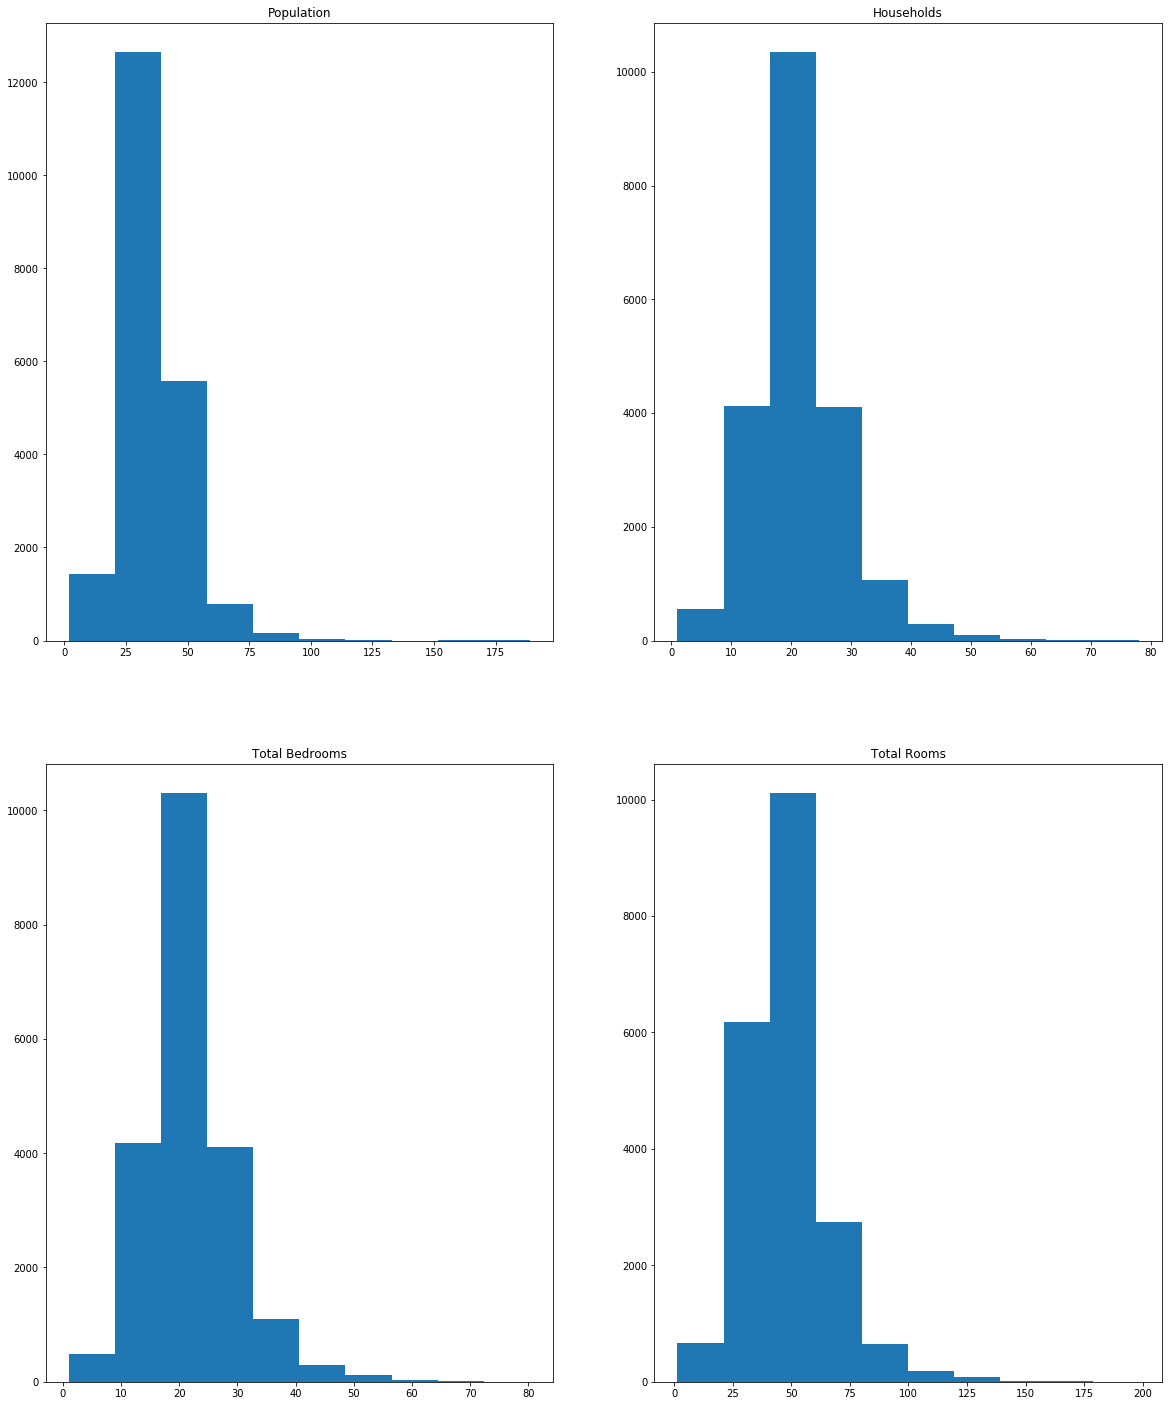

In [9]:
# transform variables to fix skewness and make them normally distributed.
fig = plt.figure(figsize=(20,25))

fig.add_subplot(221)
plt.hist(np.sqrt(housing['population'].dropna()))
plt.title('Population')

fig.add_subplot(222)
plt.hist(np.sqrt(housing['households'].dropna()))
plt.title('Households')

fig.add_subplot(223)
plt.hist(np.sqrt(housing['total_bedrooms'].dropna()))
plt.title('Total Bedrooms')

fig.add_subplot(224)
plt.hist(np.sqrt(housing['total_rooms'].dropna()))
plt.title('Total Rooms')

#fig.add_subplot(225)
#plt.hist(np.square(housing['median_income'].dropna()))
#plt.title('Median Income')

plt.show()

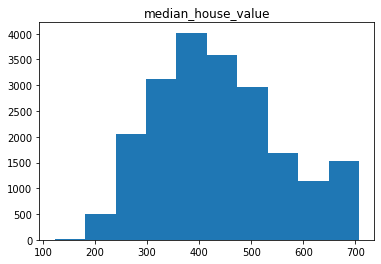

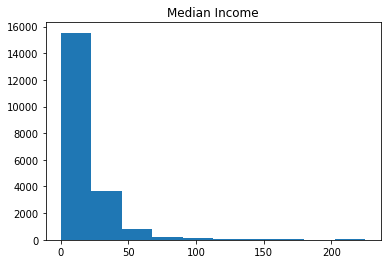

In [10]:
# transform variables to fix skewness and make them normally distributed.
plt.hist(np.sqrt(housing['median_house_value'].dropna()))
plt.title('median_house_value')
plt.show()

plt.hist(np.square(housing['median_income'].dropna()))
plt.title('Median Income')
plt.show()

In [11]:
# nice this removed quite a bit of the skewness that we were seeing from having some extremely high values from these columns. 
housing['population'] = np.sqrt(housing['population'].dropna())
housing['households'] = np.sqrt(housing['households'].dropna())
housing['total_bedrooms'] = np.sqrt(housing['total_bedrooms'].dropna())
housing['total_rooms'] = np.sqrt(housing['total_rooms'].dropna())
housing['median_income'] = np.sqrt(housing['median_income'].dropna())
housing['median_house_value'] = np.sqrt(housing['median_house_value'].dropna())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8A81C9390>,
      dtype=object)

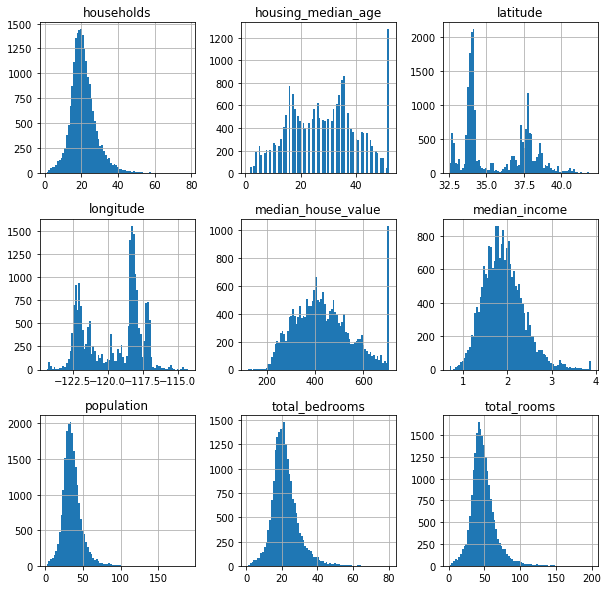

In [12]:
housing.hist(bins=80, figsize=(10,10))

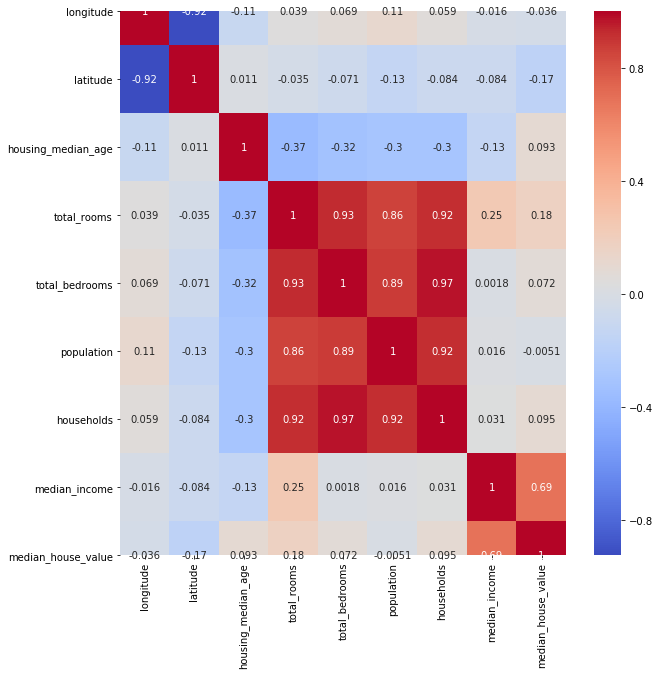

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm', ax=ax)

We can see that there isn't really any correlation between any of our values which is good. Let's model our data using multivariate regression. We will try and predict median_house_value using the other variables. 

In [14]:
from sklearn import linear_model
import statsmodels.formula.api as smf

In [15]:
regr = linear_model.LinearRegression()
y = housing['median_income'].values.reshape(-1,1)
X = housing[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value', 'housing_median_age']]
regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [[ 0.03473476 -0.06841404  0.00397051 -0.01659279  0.00212069 -0.0038521 ]]

Intercept: 
 [1.12415111]

R-squared:
0.730598635562719


In [16]:
X.head()

,total_rooms,total_bedrooms,population,households,median_house_value,housing_median_age
0,29.664794,11.357817,17.944358,11.224972,672.755528,41.0
1,84.255564,33.256578,49.000000,33.734256,598.748695,21.0
2,38.301436,13.784049,22.271057,13.304135,593.380148,52.0
3,35.693137,15.329710,23.622024,14.798649,584.208867,52.0
4,40.336088,16.733201,23.769729,16.093477,584.978632,52.0


#### Multivariate Normality Check

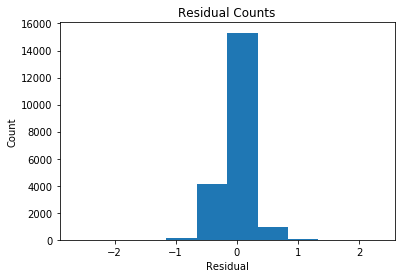

In [17]:
# checking for multivariate normality 
predicted = regr.predict(X).ravel()
actual = housing['median_income']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

It looks like our residuals are normally distributed which is a good sign. Doesn't look like we have any problems with multivariate normality.

#### Check for Heteroscedasticity

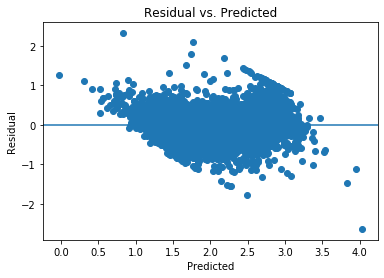

In [18]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Looks like we have some heteroscedasticity. We can fix this by either transforming our dependent variable or we can add features to to fix the poorly estimated areas. 

#### Check for Multicollinearity

In [19]:
correlation_matrix = X.corr()
display(correlation_matrix)

,total_rooms,total_bedrooms,population,households,median_house_value,housing_median_age
total_rooms,1.000000,0.931113,0.858390,0.924613,0.175231,-0.371151
total_bedrooms,0.931113,1.000000,0.885963,0.973521,0.072443,-0.319948
population,0.858390,0.885963,1.000000,0.920795,-0.005069,-0.298206
households,0.924613,0.973521,0.920795,1.000000,0.094770,-0.297129
median_house_value,0.175231,0.072443,-0.005069,0.094770,1.000000,0.092799
housing_median_age,-0.371151,-0.319948,-0.298206,-0.297129,0.092799,1.000000


Five of our variables are highly correlated. Households, total_bedrooms, total_rooms and population are very highly correlated.

In [20]:
# dropping households and total_bedrooms. This should improve our model.
y2 = housing['median_income'].values.reshape(-1,1)
X2 = housing[['households', 'total_rooms', 'median_house_value', 'housing_median_age']]
regr.fit(X2, y2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, y2))


Coefficients: 
 [[-0.06516161  0.02796836  0.00225029 -0.00372077]]

Intercept: 
 [1.06115893]

R-squared:
0.6669527808858914


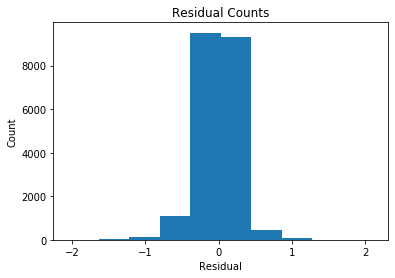

In [21]:
# checking for multivariate normality 
predicted = regr.predict(X2).ravel()
actual = housing['median_income']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
# not the best 

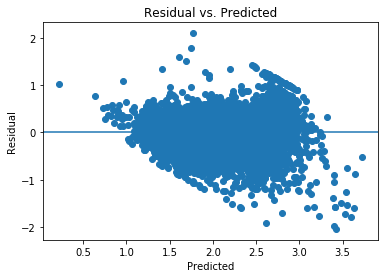

In [22]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
# not good..

It's clear that dropping variables is not the way to go as we lose too much information and lots of red flags pop up. Let's try PCA to combine our variables instead of dropping information.

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
columns = ['pca_%i' % i for i in range(4)]

pca_df = DataFrame(pca.transform(X), columns=columns, index=X.index)
pca_df.head()

TypeError: 'DataFrame' object is not callable